In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

ImportError: No module named 'netCDF4'

In [2]:
#figure out what times to pick from the big set
d0 = date(1979, 1, 1)
#convention: about 10 days prior, 10 days after
lat0 = 20.5; lon0 = 87.0;
d1 = date(2001, 8, 8)
d2 = date(2001, 8, 28)
d3 = date(2001, 8, 18)
t1 = (d1-d0).days * 24.0
t2 = (d2-d0).days * 24.0
t3 = (d3-d0).days * 24
outf = "mb_{}-{}_{}.nc".format(
    d1.strftime('%b%d').lower(), d2.strftime('%b%d').lower(), d1.strftime('%Y'))
print("ncea -d time,{},{} ~/eraint/eraint.V.850mb.2to12day.1979to2016.nc \
~/my-scratch/BandPassV/850{};".format(t1,t2,outf))
print("ncea -d time,{},{} ~/eraint/eraint.V.300mb.2to12day.1979to2016.nc \
~/my-scratch/BandPassV/300{};".format(t1,t2,outf))
print("ncea -d time,{},{} ~/eraint/eraint.V.200mb.2to12day.1979to2016.nc \
~/my-scratch/BandPassV/200{}".format(t1,t2,outf))
print("dates = '{}-{}_{}'; lat0 = {}; lon0 = {}; t_genesis = {};".format(
    d1.strftime('%b%d').lower(), d2.strftime('%b%d').lower(), d1.strftime('%Y'),
    lat0, lon0, t3))

ncea -d time,198120.0,198600.0 ~/eraint/eraint.V.850mb.2to12day.1979to2016.nc ~/my-scratch/BandPassV/850mb_aug08-aug28_2001.nc;
ncea -d time,198120.0,198600.0 ~/eraint/eraint.V.300mb.2to12day.1979to2016.nc ~/my-scratch/BandPassV/300mb_aug08-aug28_2001.nc;
ncea -d time,198120.0,198600.0 ~/eraint/eraint.V.200mb.2to12day.1979to2016.nc ~/my-scratch/BandPassV/200mb_aug08-aug28_2001.nc
dates = 'aug08-aug28_2001'; lat0 = 20.5; lon0 = 87.0; t_genesis = 198360;


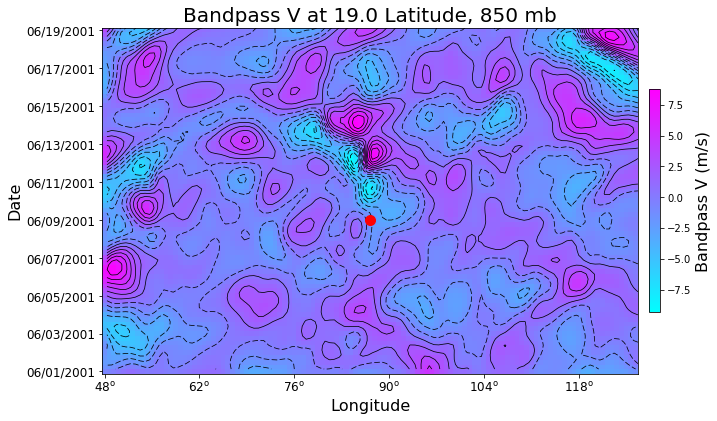

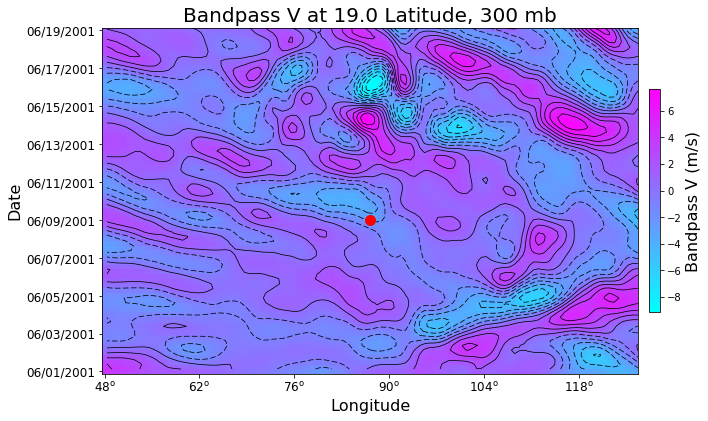

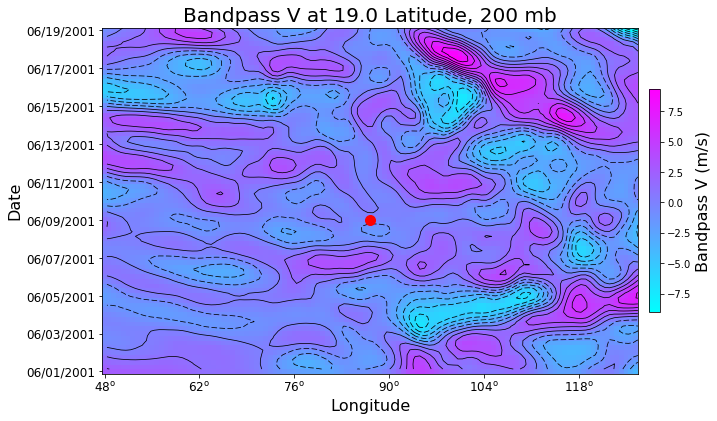

In [10]:
# change this part: date, storm center, creation time
#dates = 'jul12-aug20_2003'; lat0 = 22.0; lon0 = 87.0; t_genesis = 215232;
#dates = 'jun09-jun29_2003'; lat0 = 22.0; lon0 = 87.0; t_genesis = 214440;
#dates = 'jul23-aug13_2003'; lat0 = 20.5; lon0 = 89.0; t_genesis = 215520;
#dates = 'jun10-jun30_2002'; lat0 = 19.5; lon0 = 88.5; t_genesis = 205704;
#dates = 'jul05-jul25_2002'; lat0 = 18.0; lon0 = 87.5; t_genesis = 206304;
#dates = 'aug12-sep02_2002'; lat0 = 18.0; lon0 = 88.0; t_genesis = 207216;
dates = 'jun01-jun19_2001'; lat0 = 19.0; lon0 = 88.0; t_genesis = 196680;
#dates = 'jun28-jul18_2001'; lat0 = 21.0; lon0 = 89.0; t_genesis = 197376;
#dates = 'aug08-aug28_2001'; lat0 = 20.5; lon0 = 87.0; t_genesis = 198360;

for p in ['850', '300', '200']:
    #data collection
    fname = p + "mb_" + dates + ".nc"
    rootgroup = nc.Dataset(fname, "r", format="NETCDF4")

    #center plot on one latitude, ~lat0
    lat = rootgroup['g4_lat_1']
    y_i = 0
    while lat[y_i] > lat0:
        y_i += 1
    if np.abs(lat[y_i-1] - lat0) < np.abs(lat[y_i] - lat0):
        y_i -= 1

    #grab a chunk of lons centered around lon0
    lon = rootgroup['g4_lon_2']
    xmin = 0
    xmax = len(lon) -  1
    while lon[xmin] < lon0 - 40:
        xmin += 1
    while lon[xmax] > lon0 + 40:
        xmax -= 1
    lon = lon[xmin:xmax]
    # actual value with ~lon0:
    x_i = 0
    while lon[x_i] < lon0:
        x_i += 1
    if np.abs(lon[x_i-1] - lon0) < np.abs(lon[x_i] - lon0):
        x_i -= 1

    #time
    time = rootgroup['time']
    # actual value with ~t_genesis
    t_i = 0
    while time[t_i] < t_genesis:
        t_i += 1
    if np.abs(time[t_i-1] - t_genesis) < np.abs(time[t_i] - t_genesis):
        t_i -= 1

    #v field
    v = rootgroup['v']
    v = v[:, y_i, xmin:xmax]

    #plot creation
    f, ax = plt.subplots(figsize=(10,10))

    im = ax.imshow(v, origin='lower', cmap=plt.get_cmap('cool'))
    levels = np.linspace(np.min(v), np.max(v), 15)
    cont = ax.contour(v, levels=levels, linewidths=0.75, origin='lower', colors='k')
    cb = f.colorbar(im, ax=ax, fraction=0.02, pad=0.02)
    cb.set_label('Bandpass V (m/s)', size=16)
    ax.plot(x_i, t_i, 'ro', markersize=10)


    xticks = range(0, np.shape(v)[1], 20)
    yticks = range(0, np.shape(v)[0], 4*2)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    xlabels = [str(int(lon[i]))+'$^{\\rm o}$' for i in xticks]
    ylabels = [nc.num2date(time[i], units=time.units, calendar=time.calendar).strftime('%m/%d/%Y') for i in yticks]
    ax.set_xticklabels(xlabels, size=12)
    ax.set_yticklabels(ylabels, size=12)
    ax.set_xlabel("Longitude", size=16)
    ax.set_ylabel("Date", size=16)
    ax.set_title("Bandpass V at {} Latitude, {} mb".format(lat0, p), size=20)